# Numerical Solution of Burgers' Equation assuming some Initial Condition

In [43]:
import numpy as np

# Calculating the RHS of Burgers' Equation
def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

# Finding the values of u by the RK4 method
def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 10  # Number of grid points in space domain
dx = L / (N - 1)  # Distance between grid points
nu = 0.01  # Viscosity coefficient
dt = 0.1  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
# Generate N equally spaced points between 0 and L
x = np.linspace(0, L, N)
# Compute the sine of (pi * x) for each point in the array x
u = np.sin(np.pi * x)

# Print the table header for visualization of u values
print("Step\t" + "\t".join([f"u[{i}]" for i in range(N)]))
print("----\t" + "\t".join(["-------" for _ in range(N)]))

# Evaluation using the RK4 method
for step in range(T):
    # Calculating the value of u at each time step
    u = rk4_step(u, dx, dt, nu)
    # Print the current state of u for each time step in a tablau manner
    print(f"{step}\t" + "\t".join([f"{val:.4f}" for val in u]))


Step	u[0]	u[1]	u[2]	u[3]	u[4]	u[5]	u[6]	u[7]	u[8]	u[9]
----	-------	-------	-------	-------	-------	-------	-------	-------	-------	-------
0	0.0032	0.8650	-0.9800	0.2589	0.6603	-1.0004	0.5036	0.3842	-0.9324	0.7209
1	0.0064	0.9236	-1.0201	0.2279	0.7174	-1.0091	0.4523	0.4219	-0.9071	0.6702
2	0.0095	0.9895	-1.0690	0.1991	0.7786	-1.0258	0.4046	0.4610	-0.8880	0.6238
3	0.0124	1.0646	-1.1281	0.1724	0.8446	-1.0509	0.3604	0.5015	-0.8745	0.5811
4	0.0153	1.1510	-1.1996	0.1478	0.9165	-1.0854	0.3192	0.5435	-0.8663	0.5415
5	0.0179	1.2517	-1.2864	0.1252	0.9956	-1.1303	0.2810	0.5872	-0.8631	0.5046
6	0.0204	1.3710	-1.3926	0.1046	1.0839	-1.1872	0.2455	0.6326	-0.8649	0.4701
7	0.0227	1.5147	-1.5238	0.0860	1.1838	-1.2586	0.2126	0.6802	-0.8717	0.4376
8	0.0247	1.6914	-1.6888	0.0692	1.2987	-1.3475	0.1823	0.7301	-0.8835	0.4069
9	0.0265	1.9146	-1.9006	0.0542	1.4333	-1.4588	0.1543	0.7829	-0.9008	0.3777


# Visualization of the solution of the Burgers' Equation

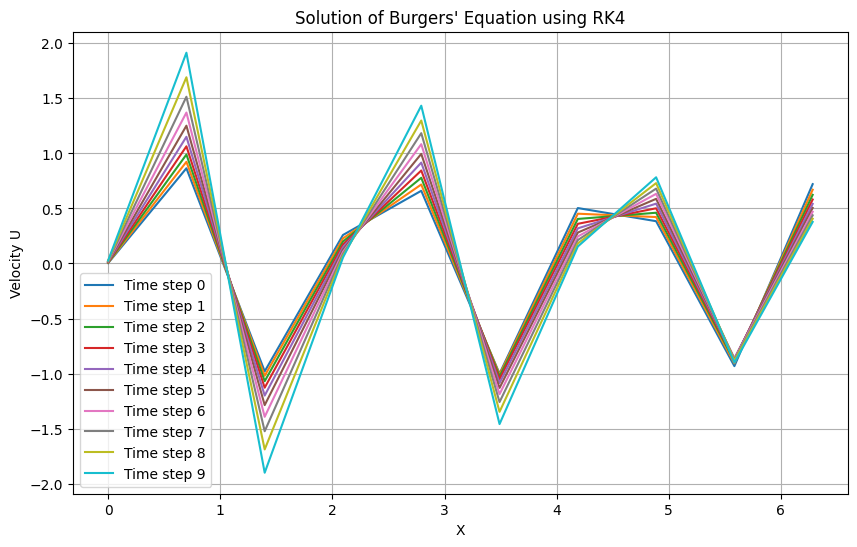

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Calculating the RHS of Burgers' Equation
def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

# Finding the values of u by the RK4 method
def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 10  # Number of grid points in space domain
dx = L / (N - 1)  # Distance between grid points
nu = 0.01  # Viscosity coefficient
dt = 0.1  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
# Generate N equally spaced points between 0 and L
x = np.linspace(0, L, N)
# Compute the sine of (pi * x) for each point in the array x
u = np.sin(np.pi * x)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Evaluation using the RK4 method
for step in range(T):
    # Calculating the value of u at each time step
    u = rk4_step(u, dx, dt, nu)
    # Plot each time step
    plt.plot(x, u, label=f'Time step {step}')

# Set the title of the plot
plt.title("Solution of Burgers' Equation using RK4")
# Label the x-axis
plt.xlabel('X')
# Label the y-axis
plt.ylabel('Velocity U')
# Enable the grid on the plot
plt.grid()
# Add a legend to the plot to describe plotted data
plt.legend()
# Display the plot
plt.show()